# Multiple Linear Regression

In [1]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('gadget_store_data.csv')
df

,Product,Price,Units_Sold,Marketing_Spend,Discount,Store_Rating,Revenue
0,Headphones,624.356166,491,10048.003239,18.997223,4.870045,320990.190077
1,Bluetooth Speaker,1431.000029,145,16796.058311,22.077138,1.741835,230842.337861
2,Smartphone,1124.791519,306,6847.767556,25.443843,2.848389,328193.209929
3,Smartphone,938.121878,374,16511.328969,3.683307,1.004927,346213.668259
4,Gaming Console,318.426097,53,19391.501543,26.293322,3.393309,35562.237686
...,...,...,...,...,...,...,...
345,Fitness Tracker,962.190137,121,18943.784786,15.910632,3.412878,113665.493470
346,Monitor,989.131111,88,3680.555127,0.535857,2.348909,91900.874839
347,Smartphone,163.425614,203,8721.453857,23.903935,4.622099,33831.703962
348,Gaming Console,624.457660,299,7155.811161,8.825039,4.090491,181177.061530


In [3]:
# Define the independent variables (X) and the dependent variable (y)
X = df[['Price', 'Units_Sold', 'Marketing_Spend', 'Discount', 'Store_Rating']]
y = df['Revenue']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the regression results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     494.1
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          1.40e-154
Time:                        12:55:35   Log-Likelihood:                -4314.0
No. Observations:                 350   AIC:                             8640.
Df Residuals:                     344   BIC:                             8663.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.133e+05   1.45e+04    -14.722      0.000   -2.42e+05   -1.85e+05
Price             270.6047      7.248     37.333      0.000     256.348     284.861
Units_Sold        787.7972     22.825     34.515      0.000     742.904     832.691
Marketing_Spend     0.3662      0.568      0.645      0.519      -0.750       1.482
Discount         -512.7581    328.235     -1.562      0.119   -1158.359     132.843
Store_Rating     1455.0668   2724.537      0.534      0.594   -3903.782    6813.916
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                0.854
Skew:                          -0.082   Prob(JB):                        0.653
Kurtosis:                       3.177   Cond. No.                     5.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Generate predicted revenue using the model
df['Predicted_Revenue'] = model.predict(X)

# Display first few rows to verify
df[['Revenue', 'Predicted_Revenue']].head()

,Revenue,Predicted_Revenue
0,320990.190077,343464.501092
1,230842.337861,285508.133205
2,328193.209929,325723.152563
3,346213.668259,340793.648054
4,35562.237686,-86845.452027


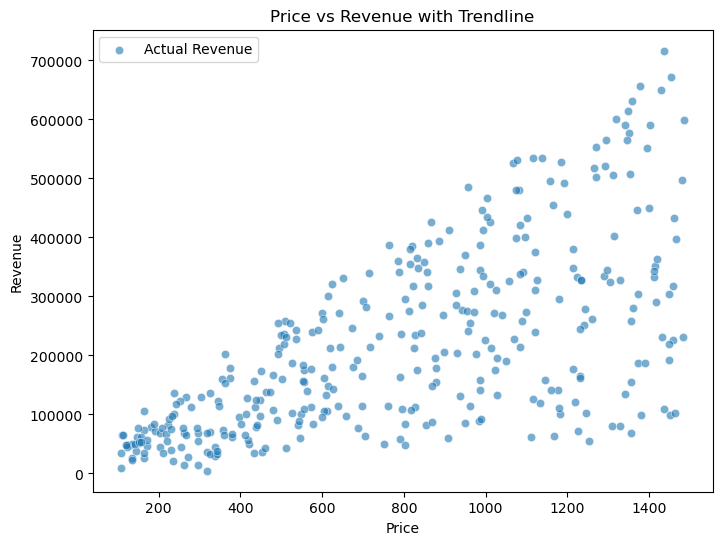

In [18]:
# Scatter plot of Price vs Revenue (Actual values)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Price', y='Revenue', data=df, label='Actual Revenue', alpha=0.6)

# Scatter plot of Price vs Predicted Revenue (Trendline)
# We sort the values by Price to ensure the trendline is smooth
#sorted_df = df.sort_values(by='Price')
#plt.plot(sorted_df['Price'], sorted_df['Predicted_Revenue'], color='red', label='Predicted Revenue (Trendline)', linewidth=2)

# Add labels and title
plt.title('Price vs Revenue with Trendline')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.legend()


##### Here’s a breakdown of how to interpret each value from the regression table

1. Omnibus and Prob(Omnibus):
The Omnibus test checks for the overall normality of the residuals (errors) in the regression model.
Prob(Omnibus) = 0.577: This is the p-value associated with the test. Since it’s greater than 0.05, it suggests that the residuals are normally distributed, which is a good sign for regression analysis.
2. Durbin-Watson:
The Durbin-Watson statistic tests for autocorrelation in the residuals (errors).
Durbin-Watson = 2.030: A value close to 2 indicates that there is no autocorrelation. Values closer to 0 or 4 indicate positive or negative autocorrelation, respectively. In your case, the residuals are not significantly autocorrelated, which is a good result for regression assumptions.
3. Jarque-Bera (JB) and Prob(JB):
The Jarque-Bera test also tests whether the residuals are normally distributed by measuring skewness and kurtosis.
JB = 0.854 and Prob(JB) = 0.653: Since the p-value is greater than 0.05, this indicates that the residuals follow a normal distribution. This further supports the normality assumption.
4. Skew:
Skew = -0.082: Skewness measures the symmetry of the residuals. A value close to 0 suggests that the residuals are fairly symmetric, which is another good sign. Negative skew means the residuals are slightly skewed to the left, but the value is very close to 0, so the skewness is negligible.
5. Kurtosis:
Kurtosis = 3.177: Kurtosis measures the "tailedness" of the distribution. A kurtosis value close to 3 indicates a normal distribution (Mesokurtic). In your case, 3.177 is very close to 3, indicating that the residuals have a distribution close to normal with slightly heavier tails.
6. Condition Number (Cond. No.):
Cond. No. = 5.95e+04: The condition number measures multicollinearity or near-linear dependence between the predictors. A high value (typically over 30) indicates that multicollinearity might be present.
Your value (59,500) is quite high, suggesting potential multicollinearity, meaning some predictors might be highly correlated with each other, which could impact the stability and interpretation of the regression coefficients.

##### Summary:
- The residuals appear normally distributed (Omnibus, JB tests).
- There is no autocorrelation (Durbin-Watson).
- There is a very slight left skew and nearly normal kurtosis.
- However, the high condition number suggests possible multicollinearity, which may require further investigation (e.g., through VIF—Variance Inflation Factor analysis).

In [40]:
# Calculate the correlation between Revenue and Price
correlation = stats.pearsonr(data['Revenue'], data['Price'])

correlation

PearsonRResult(statistic=0.6652104861968892, pvalue=4.49015130057096e-46)

Null Hypothesis: there is no correlation between revenue and price

##### Correlation coefficient (r = 0.665):

This value indicates a moderate to strong positive linear relationship between Revenue and Price. As the price increases, the revenue tends to increase as well.
The correlation value ranges from -1 to 1, where:
- 1 means a perfect positive correlation,
- 0 means no correlation,
- -1 means a perfect negative correlation.
  
##### p-value (p = 4.49e-46):

we can reject the null hypothesis (which states there is no correlation between Revenue and Price).

##### Conclusion:
There is a statistically significant positive correlation between the price of the product and the revenue, suggesting that higher prices tend to result in higher revenue.

C:\Users\chedeema\AppData\Local\Temp\ipykernel_14524\3287475227.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Revenue', data=data, ci=None)


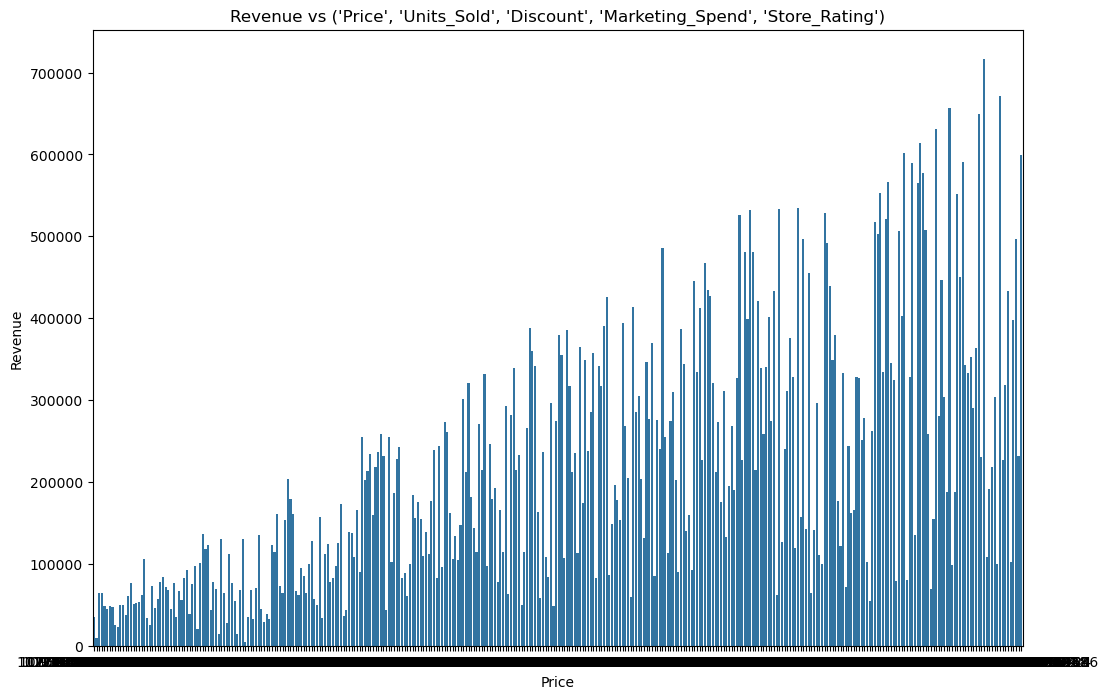

C:\Users\chedeema\AppData\Local\Temp\ipykernel_14524\3287475227.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Revenue', data=data, ci=None)


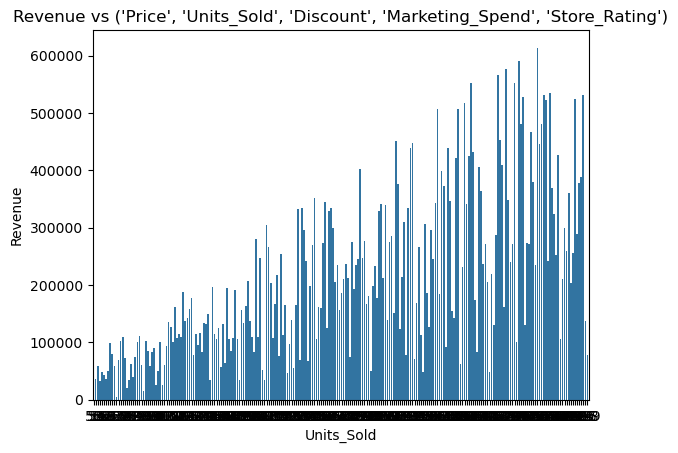

C:\Users\chedeema\AppData\Local\Temp\ipykernel_14524\3287475227.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Revenue', data=data, ci=None)


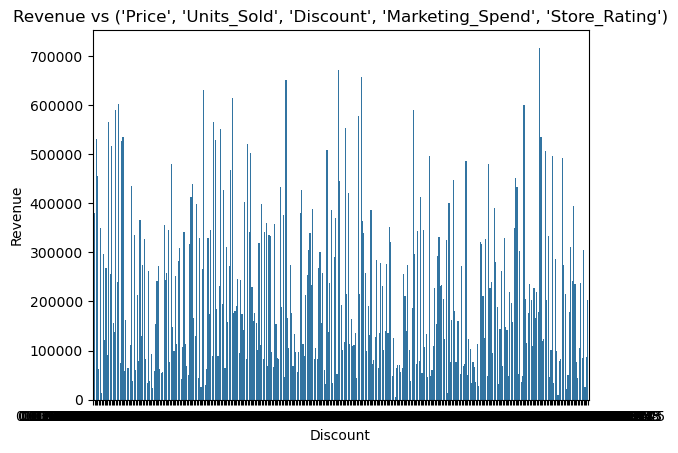

C:\Users\chedeema\AppData\Local\Temp\ipykernel_14524\3287475227.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Revenue', data=data, ci=None)


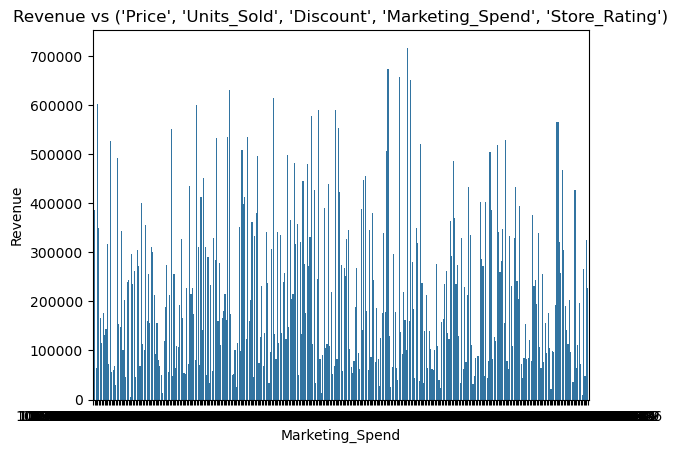

C:\Users\chedeema\AppData\Local\Temp\ipykernel_14524\3287475227.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Revenue', data=data, ci=None)


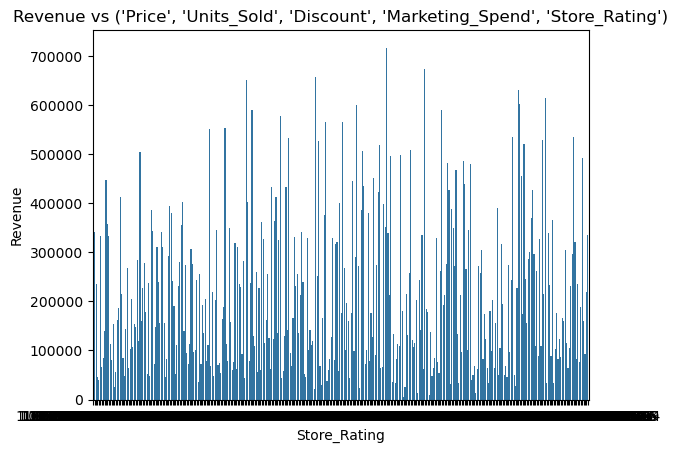

In [52]:
# Select the columns of interest for plotting
columns_of_interest = ['Price', 'Units_Sold', 'Discount', 'Marketing_Spend', 'Store_Rating', 'Revenue']

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot bar chart with revenue against the other variables
for column in columns_of_interest[:-1]:  # Exclude 'Revenue' from x-axis
    sns.barplot(x=column, y='Revenue', data=data, ci=None)
    plt.title(f'Revenue vs {'Price','Units_Sold', 'Discount', 'Marketing_Spend', 'Store_Rating'}')
    plt.show()

In [59]:
# Select the predictor variables (exclude the target variable)
predictors = df[['Price', 'Units_Sold', 'Discount', 'Marketing_Spend', 'Store_Rating']]  # Update with your predictor variables

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = predictors.columns
vif_data["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

print(vif_data)

           Feature       VIF
0            Price  3.695152
1       Units_Sold  4.637637
2         Discount  3.409274
3  Marketing_Spend  4.520863
4     Store_Rating  6.420838
